<a href="https://colab.research.google.com/github/CharlyMech/IEDIB_CEIA_2024-25/blob/main/Sistemas%20de%20BigData/Bloque%205/Actividades/5.1/CE_5074_5_1_Section_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install datashader

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 38.0 MB/s eta 0:00:00


In [2]:
!pip install dash

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 48.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.0/228.0 kB 16.5 MB/s eta 0:00:00
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 3.1.3
    Uninstalling Werkzeug-3.1.3:
      Successfully uninstalled Werkzeug-3.1.3
  Attempting uninstall: Flask
    Found existing installation: Flask 3.1.0
    Uninstalling Flask-3.1.0:
      Successfully uninstalled Flask-3.1.0


In [1]:
import pandas as pd

df = pd.read_csv('https://datosabiertos.jcyl.es/web/jcyl/risp/es/medio-ambiente/calidad-aire-historico-horario/1284808467480.csv', sep=';')
df.head()

<ipython-input-1-caaa7a869745>:3: DtypeWarning: Columns (2,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('https://datosabiertos.jcyl.es/web/jcyl/risp/es/medio-ambiente/calidad-aire-historico-horario/1284808467480.csv', sep=';')


,Fecha,CO (mg/m3),NO (ug/m3),NO2 (ug/m3),O3 (ug/m3),PM10 (ug/m3),PM25 (ug/m3),SO2 (ug/m3),Provincia,Estación,Latitud,Longitud
0,31/12/2018 24,NaN,3.0,33.0,NaN,13.0,NaN,7.0,León,C.T.Compostilla-Compostilla,42.570833,-6.589444
1,31/12/2018 24,NaN,52.0,33.0,2.0,NaN,NaN,NaN,Valladolid,Renault1,41.600000,-4.732500
2,31/12/2018 24,NaN,9.0,22.0,41.0,7.0,NaN,8.0,Soria,Soria,41.766667,-2.466667
3,31/12/2018 24,NaN,2.0,2.0,50.0,1.0,1.0,NaN,Palencia,C.T.G. - Compuerto,42.849167,-4.835833
4,31/12/2018 24,NaN,1.0,9.0,34.0,4.0,NaN,1.0,León,C.T.L.R. - Cuadros,42.715556,-5.638889


In [9]:
# Prefilter the data
df = df[df['Estación'] == 'Renault1'].copy()
# df['Fecha'] = pd.to_datetime(df['Fecha'], dayfirst=True)
df.head()

,Fecha,CO (mg/m3),NO (ug/m3),NO2 (ug/m3),O3 (ug/m3),PM10 (ug/m3),PM25 (ug/m3),SO2 (ug/m3),Provincia,Estación,Latitud,Longitud
1,31/12/2018 24,NaN,52.0,33.0,2.0,NaN,NaN,NaN,Valladolid,Renault1,41.6,-4.7325
97,31/12/2018 23,NaN,33.0,36.0,1.0,NaN,NaN,NaN,Valladolid,Renault1,41.6,-4.7325
137,31/12/2018 22,NaN,48.0,45.0,2.0,NaN,NaN,NaN,Valladolid,Renault1,41.6,-4.7325
173,31/12/2018 21,NaN,58.0,57.0,1.0,NaN,NaN,NaN,Valladolid,Renault1,41.6,-4.7325
222,31/12/2018 20,NaN,86.0,67.0,1.0,NaN,NaN,NaN,Valladolid,Renault1,41.6,-4.7325


# 1 - Nitrogen Monoxide (NO mg/m3)

<ipython-input-18-4bf0d9f3430d>:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_no['Timestamp'] = pd.to_datetime(df_no['Fecha'], dayfirst=True, errors='coerce')


CPU times: user 15.1 ms, sys: 0 ns, total: 15.1 ms
Wall time: 15.2 ms


<ipython-input-18-4bf0d9f3430d>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no['Timestamp'] = df_no['Timestamp'].astype('int64') // 10**9 # Convert to Unix timestamp (seconds)


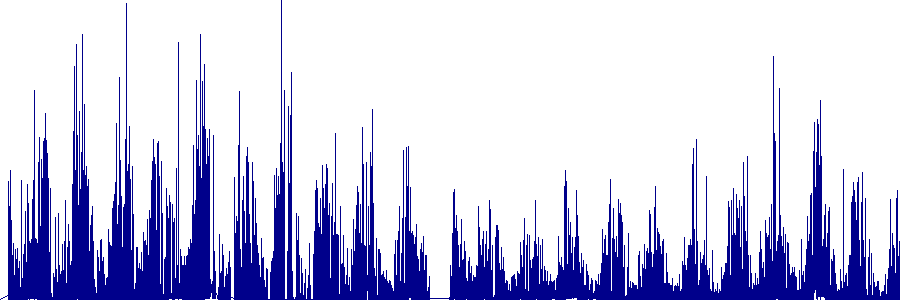

In [18]:
import datashader as ds
import datashader.transfer_functions as tf

# colors = ["#1f77b4", "#ff7f0e", "#2ca02c"]
df_no = df[df['NO (ug/m3)'].notna()].copy()
df_no['NO (ug/m3)'] = pd.to_numeric(df_no['NO (ug/m3)'], errors='coerce') # There might be string types
df_no['Timestamp'] = pd.to_datetime(df_no['Fecha'], dayfirst=True, errors='coerce')
df_no = df_no.dropna(subset=['Timestamp'])

x_range_no = (df_no['Timestamp'].min(), df_no['Timestamp'].max())
y_range_no = (df_no['NO (ug/m3)'].min(), df_no['NO (ug/m3)'].max())

cvs_no = ds.Canvas(x_range=x_range_no, y_range=y_range_no, plot_height=300, plot_width=900)
agg_no = cvs_no.line(df_no, "Timestamp", "NO (ug/m3)")

%time tf.shade(agg_no)

# 2 - Nitrogen Dioxide (NO2 mg/m3)

In [ ]:
import datashader as ds
import datashader.transfer_functions as tf

# colors = ["#1f77b4", "#ff7f0e", "#2ca02c"]
df_no2 = df[df['NO2 (ug/m3)'].notna()].copy()
x_range_no2 = (df_no2.iloc[0]['Fecha'], df_no2.iloc[-1]['Fecha'])
y_range_no2 = (df_no2['NO2 (ug/m3)'].min(), df_no2['NO2 (ug/m3)'].max())

cvs_no2 = ds.Canvas(x_range=x_range_no, y_range=y_range_no, plot_height=300, plot_width=900)
%time tf.shade(cvs_no2.line(df_no2, "Fecha", "NO2 (ug/m3)"))